# Data Analysis using Python - A Case Study

*Analyzing responses from the Stack Overflow Annual Developer Survey 2023*

we are going to analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow .


Let's Download the all required libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
%matplotlib inline

In [3]:
os.getcwd()

'C:\\Users\\EKTA'

In [4]:
os.chdir(r"C:\Users\EKTA\OneDrive\Desktop\port folio projects\Python_Port_Folio_Projects")

In [5]:
os.getcwd()

'C:\\Users\\EKTA\\OneDrive\\Desktop\\port folio projects\\Python_Port_Folio_Projects'

Let's Download the dataset in Pandas Dataframe

In [6]:
survey_raw_df = pd.read_csv("survey_results_public.csv")
schema_raw = pd.read_csv("survey_results_schema.csv")

In [7]:
survey_raw_df

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


It appears that shortcodes for questions have been used as column names.

We can refer to schema file to see the full text of each question . The schema file contains six colunms. We have already downloaded in pandas Dataframe above.

In [8]:
schema_raw

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
...,...,...,...,...,...,...
73,QID289,Knowledge_7,Waiting on answers to questions often causes i...,NaN,MC,MAVR
74,QID289,Knowledge_8,I feel like I have the tools and/or resources ...,NaN,MC,MAVR
75,QID290,Frequency_1,Needing help from people outside of your immed...,NaN,MC,MAVR
76,QID290,Frequency_2,Interacting with people outside of your immedi...,NaN,MC,MAVR


We have now loaded the dataset . We are ready to move on the next step of preprocessing & cleaning the data for our analysis.

# Data Preparation & Cleaning

While the survey responses contain a wealth of information , we'll limit our analysis to the following areas:

* Demographics of the survey respondents and the global programming community

* Distribution of programming skills , experience and preferences

* Employment-related information , preferences and opinions

* Tools, language , platform , used by programmers



Let's select a subset of columns with the relevant data for our analysis.

In [9]:
survey_raw_df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonalUse',
       'OpSysProfessionalUse', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantT

In [10]:
selected_columns = [
        #Coding level
    'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
     'Country','Currency', 'CompTotal',
        #Language & Tools Worked With
    'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       
         # AI Tools
    'AISearchHaveWorkedWith',
       'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith',
      'Industry'
    
]

In [11]:
len(selected_columns)

29

Let's extract a copy of the data from these columns into a new data frame `survey_df` . We can continue to  modify further without affecting the original data frame.

In [12]:
survey_df = survey_raw_df[selected_columns].copy()

In [13]:
survey_df

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,Industry
0,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,...,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,"Information Services, IT, Software Development..."
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,...,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information Services, IT, Software Development..."
3,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,...,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,NaN,NaN,NaN,NaN,NaN,NaN
4,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,...,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Amazon Web Services (AWS);Cloudflare;Digital O...,Express;Gatsby;NestJS;Next.js;Node.js;React,Express;NestJS;Next.js;Node.js;React;Remix;Vue.js,NaN,ChatGPT,ChatGPT,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,20,...,Digital Ocean;Firebase;Google Cloud;Heroku;Vercel,Amazon Web Services (AWS);Heroku;Netlify;Vercel,Angular;AngularJS;Express;jQuery;Node.js;Nuxt....,Express;Node.js;Nuxt.js;Svelte;Vue.js,Flutter,ChatGPT,ChatGPT,Whispr AI,Whispr AI,NaN
89180,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,NaN,5,...,NaN,NaN,Spring Boot,Spring Boot,Flutter;Opencv;RabbitMQ;Spring Framework;Torch...,ChatGPT,ChatGPT,NaN,NaN,NaN
89181,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,Codecademy;Coursera,10,...,Amazon Web Services (AWS),Amazon Web Services (AWS);Microsoft Azure,NaN,NaN,NumPy;Pandas;TensorFlow,ChatGPT;Quora Poe,ChatGPT;Quora Poe,NaN,NaN,NaN
89182,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high s

In [14]:
survey_df.shape

(89184, 29)

In [15]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              89184 non-null  object 
 1   Age                     89184 non-null  object 
 2   Employment              87898 non-null  object 
 3   RemoteWork              73810 non-null  object 
 4   CodingActivities        73764 non-null  object 
 5   EdLevel                 87973 non-null  object 
 6   LearnCode               87663 non-null  object 
 7   LearnCodeOnline         70084 non-null  object 
 8   LearnCodeCoursesCert    37076 non-null  object 
 9   YearsCode               87435 non-null  object 
 10  YearsCodePro            66136 non-null  object 
 11  DevType                 76872 non-null  object 
 12  Country                 87973 non-null  object 
 13  Currency                65334 non-null  object 
 14  CompTotal               48225 non-null

Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (89184). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to `NaN`.

In [16]:
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Let's now view some basic statistics about numeric columns.

In [17]:
survey_df.describe()

,YearsCode,YearsCodePro,CompTotal
count,86114.000000,64217.000000,4.822500e+04
mean,13.972049,11.508354,1.036807e+42
std,10.259548,9.070346,2.276847e+44
min,1.000000,1.000000,0.000000e+00
25%,6.000000,5.000000,6.300000e+04
50%,11.000000,9.000000,1.150000e+05
75%,20.000000,16.000000,2.300000e+05
max,50.000000,50.000000,5.000000e+46


## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some [selection bias](https://en.wikipedia.org/wiki/Selection_bias).

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [31]:
survey_df.Country.nunique()

185

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [32]:
top_countries = survey_df.Country.value_counts().head(10)
top_countries

United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Name: Country, dtype: int64

We can visualize this information using a bar chart.

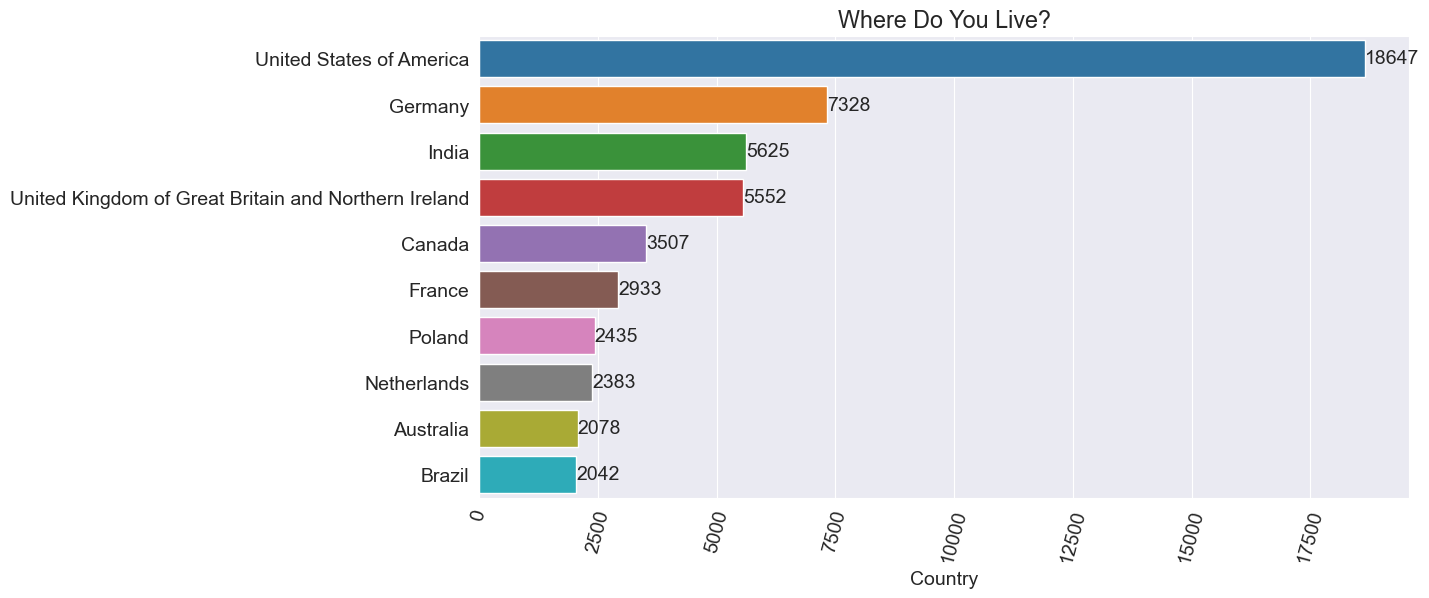

In [50]:
plt.figure(figsize=(12,6));
plt.xticks(rotation=75);
plt.xlabel('Number of responses');
plt.title('Where Do You Live?');
ax= sns.barplot(x=top_countries, y=top_countries.index);
for bars in ax.containers:
    ax.bar_label(bars);

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.


### Age

The distribution of respondents' age is another crucial factor to look at. We can use a barplot to visualize it. 

In [34]:
unique_age_groups= survey_df.Age.nunique()
unique_age_groups

8

In [52]:
age_groups = survey_df['Age'].value_counts().head(8)

In [53]:
age_groups

25-34 years old       33247
35-44 years old       20532
18-24 years old       17931
45-54 years old        8334
Under 18 years old     4128
55-64 years old        3392
65 years or older      1171
Prefer not to say       449
Name: Age, dtype: int64

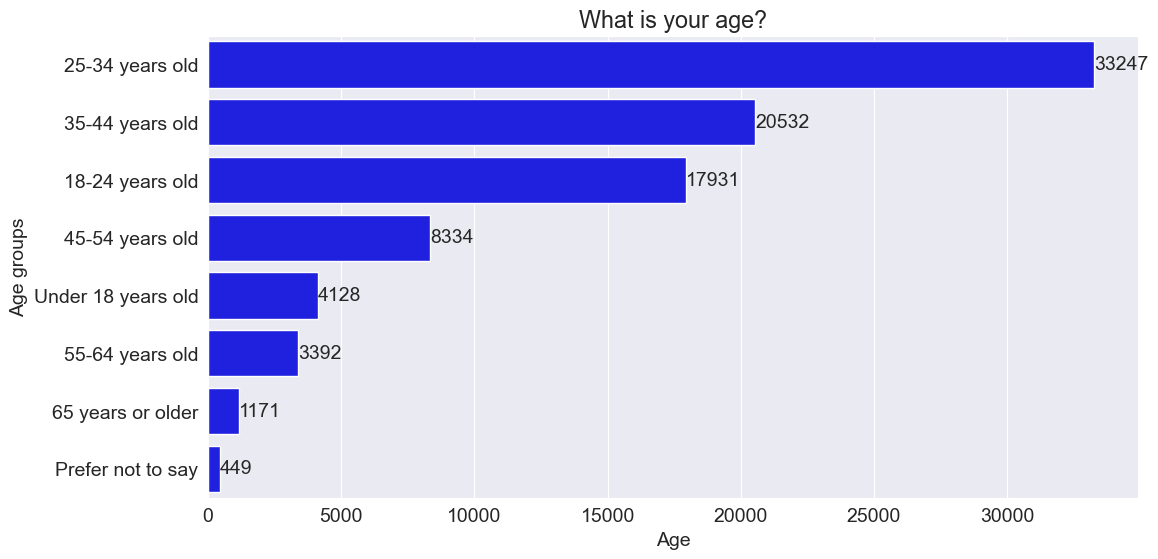

In [54]:
plt.figure(figsize=(12, 6));
plt.title('What is your age?');
plt.ylabel('Age groups');
plt.xlabel('Number of respondents');
ax=sns.barplot(x=age_groups,y= age_groups.index ,color='blue');
for bars in ax.containers:
    ax.bar_label(bars);

It appears that a large percentage of respondents are 18-54 years old Age Group .It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

# Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer . However, there are many free resources & tutorails available online to learn programming . Let's compare the education levels of respondents to gain some insight into this. We will use a Horizontal bar plot here.

In [55]:
ed = survey_df.EdLevel.value_counts(ascending = False)


In [56]:
ed


Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          36706
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       20543
Some college/university study without earning a degree                                11753
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8897
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         3887
Associate degree (A.A., A.S., etc.)                                                    2807
Primary/elementary school                                                              1905
Something else                                                                         1475
Name: EdLevel, dtype: int64

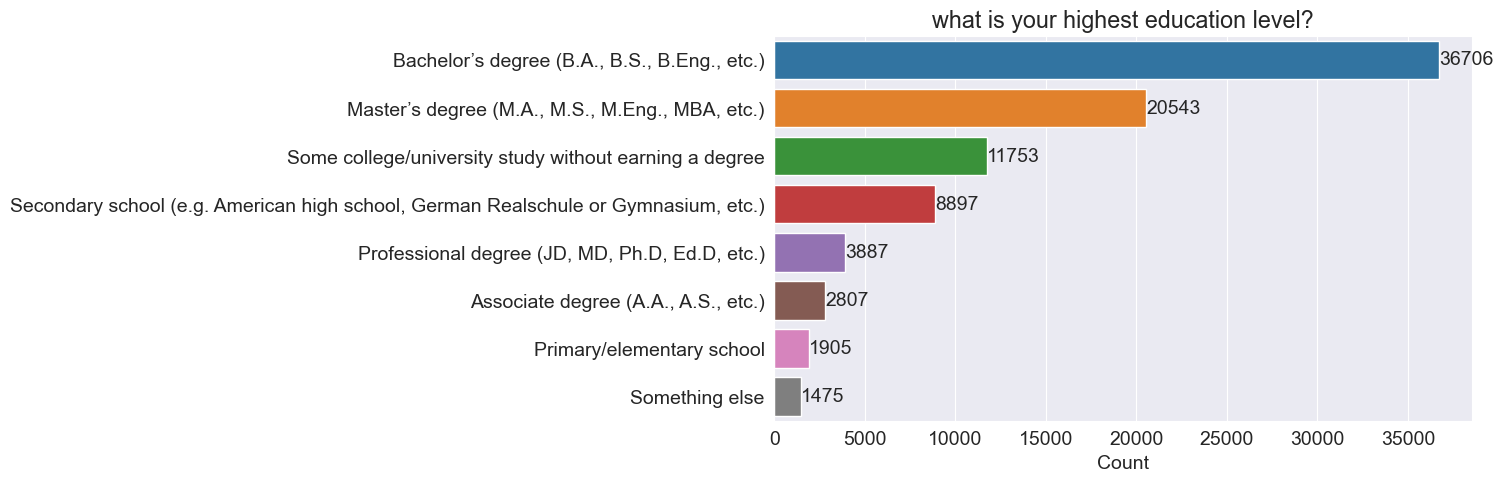

In [57]:
ax= sns.barplot( y= ed.index , x= ed );
plt.title("what is your highest education level?");
plt.xlabel('Count');
for bars in ax.containers:
    ax.bar_label(bars);

It appears that maximum number of  people have some kind of college education . But , it is not clear that, they have had computer science as thier college degree.

## Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

In [58]:
survey_df.Employment.nunique()

106

In [59]:
emp=survey_df.Employment.value_counts().head(10)

In [60]:
emp

Employed, full-time                                                         53748
Student, full-time                                                           7430
Independent contractor, freelancer, or self-employed                         7076
Employed, full-time;Independent contractor, freelancer, or self-employed     4354
Not employed, but looking for work                                           2553
Employed, part-time                                                          1644
Student, full-time;Employed, part-time                                       1392
Employed, full-time;Student, part-time                                       1028
Employed, full-time;Student, full-time                                        923
Not employed, and not looking for work                                        844
Name: Employment, dtype: int64

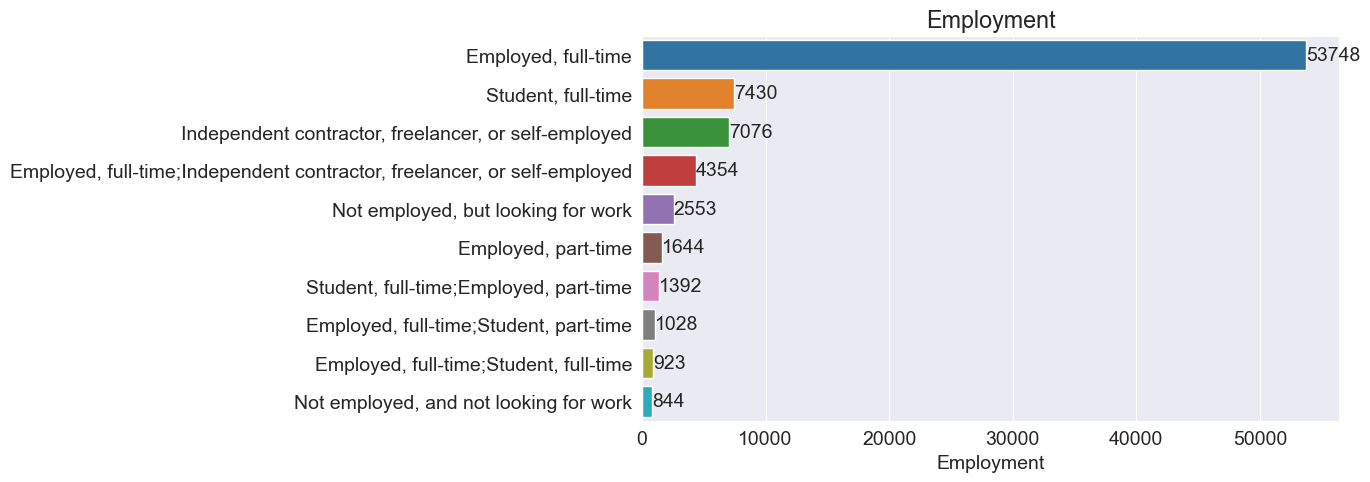

In [61]:
ax=sns.barplot(x = emp , y= emp.index );
plt.title('Employment');
for bars in ax.containers:
    ax.bar_label(bars)

*It appears that maximum people are full time employed*

## Profession

Let's see which types of developers are there. To see , we will use this column `DevType`.

In [63]:
survey_df.DevType.nunique()

33

In [64]:
dev=survey_df.DevType.value_counts().head(20)

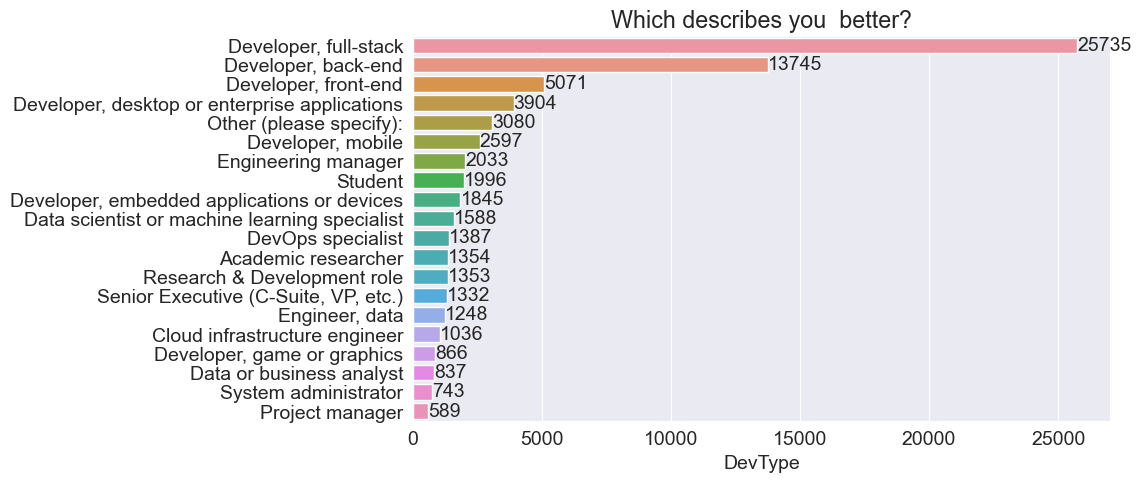

In [68]:
ax = sns.barplot(x=dev , y= dev.index);
plt.title("Which describes you  better?");
for bars in ax.containers:
    ax.bar_label(bars)

Let's define a helper function that turns a column containing lists of values into a data frame with one column for each possible option.

In [69]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [70]:
survey_df.LanguageHaveWorkedWith

0                                                      NaN
1                               HTML/CSS;JavaScript;Python
2                               Bash/Shell (all shells);Go
3        Bash/Shell (all shells);HTML/CSS;JavaScript;PH...
4                           HTML/CSS;JavaScript;TypeScript
                               ...                        
89179              HTML/CSS;Java;JavaScript;SQL;TypeScript
89180                                 Dart;Java;Python;SQL
89181    Assembly;Bash/Shell (all shells);C;C#;Python;R...
89182    Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...
89183                      C#;Go;JavaScript;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 89184, dtype: object

First, we'll split this column into a data frame containing a column of each language listed in the options.

In [71]:
languages_worked_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)

In [73]:
languages_worked_df

,HTML/CSS,JavaScript,Python,Bash/Shell (all shells),Go,PHP,Ruby,SQL,TypeScript,Ada,...,GDScript,Crystal,Cobol,Fortran,Prolog,Erlang,Apex,SAS,Nim,Flow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,True,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,True,True,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
89180,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
89181,False,False,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
89182,True,True,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 51 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.


In [74]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript                 62.467483
HTML/CSS                   52.022784
Python                     48.392088
SQL                        47.792205
TypeScript                 38.169403
Bash/Shell (all shells)    31.789334
Java                       30.002018
C#                         27.127063
C++                        22.015160
C                          18.994438
PHP                        18.247668
PowerShell                 13.345443
Go                         12.997847
Rust                       12.812836
Kotlin                      8.897336
Ruby                        6.115447
Lua                         5.983136
Dart                        5.912496
Assembly                    5.329431
Swift                       4.565841
R                           4.150969
Visual Basic (.Net)         4.000718
MATLAB                      3.743945
VBA                         3.483809
Groovy                      3.336921
Delphi                      3.174336
Scala                       2.715734
P

We can plot this information using a horizontal bar chart.

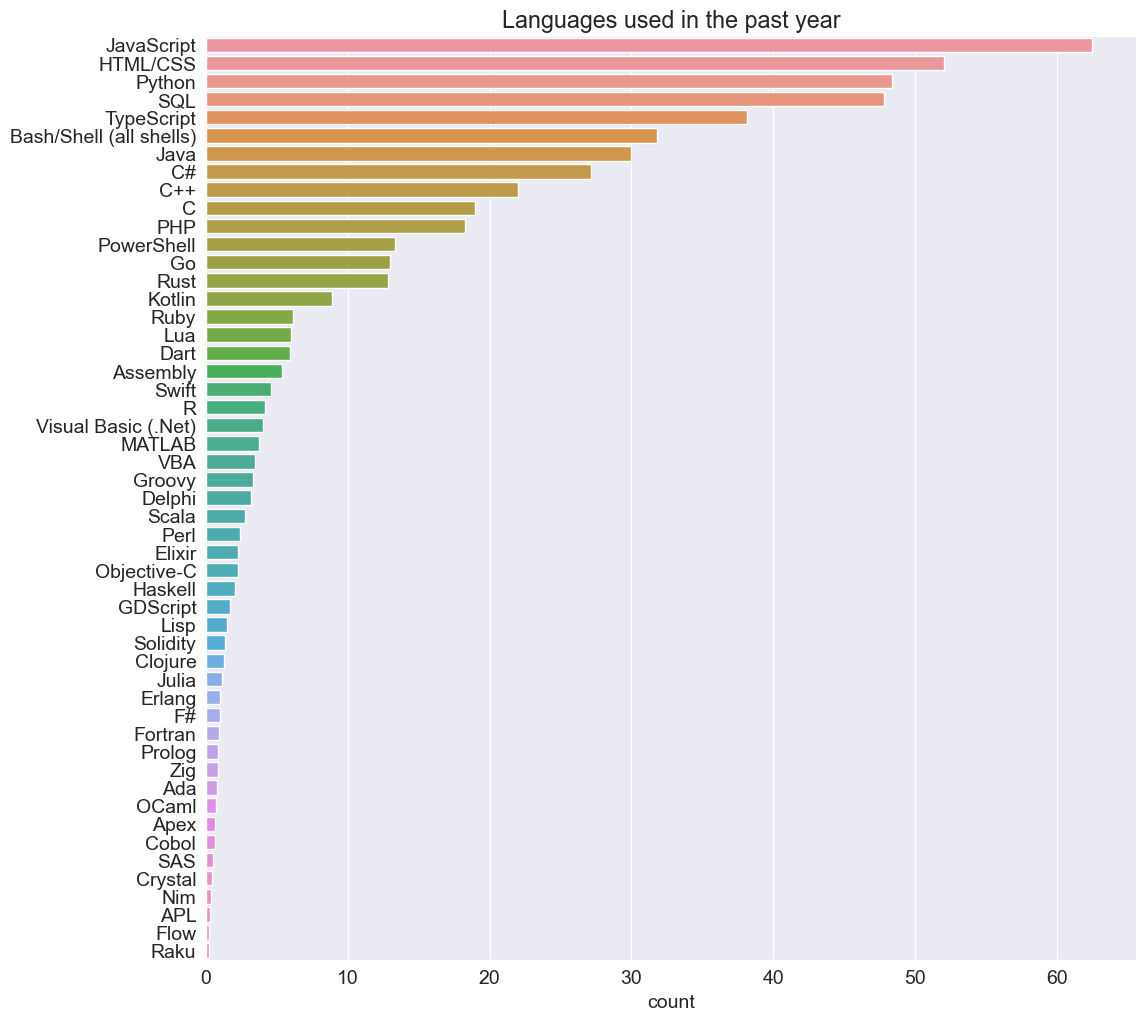

In [75]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

Perhaps unsurprisingly, Javascript & HTML/CSS comes out at the top as web development, is one of today's most sought skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades.

## Language

let's findout , which language is more desired language next year for programmers .we can use the `LanguageWantToWorkWith` column, with similar processing as the previous one.

In [78]:
languages_interested_df = split_multicolumn(survey_df.LanguageWantToWorkWith)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages.head(15)

JavaScript                 39.229010
Python                     38.925144
TypeScript                 36.167922
HTML/CSS                   33.557589
SQL                        33.187567
Rust                       29.949318
C#                         20.847910
Bash/Shell (all shells)    20.495829
Go                         20.175144
Java                       16.128454
C++                        15.956898
Kotlin                     11.838446
C                          11.245291
PHP                         8.985917
PowerShell                  6.886886
dtype: float64

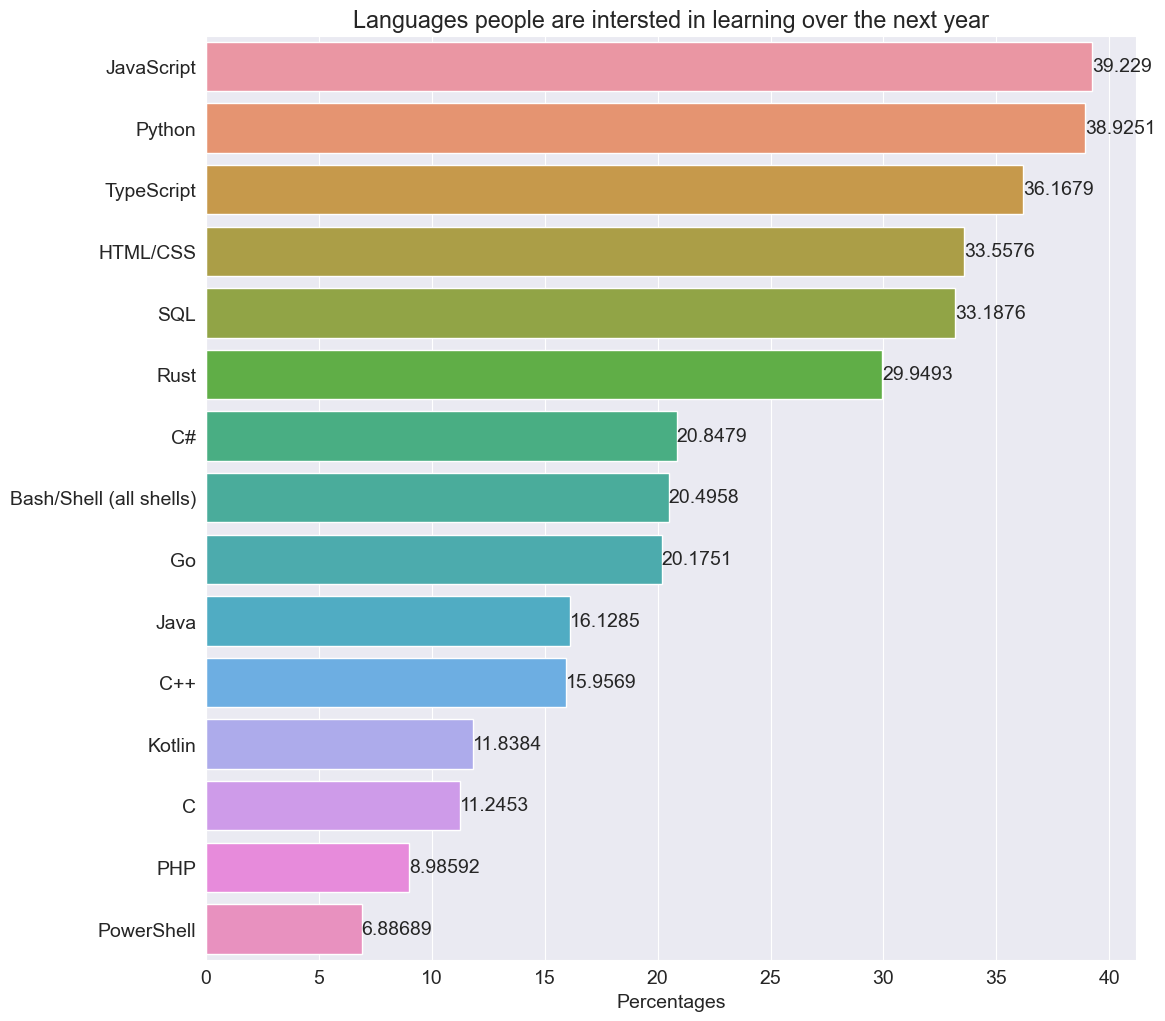

In [81]:
plt.figure(figsize=(12, 12))
ax=sns.barplot(x=languages_interested_percentages.head(15), y=languages_interested_percentages.head(15).index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('Percentages');
for bars in ax.containers:
    ax.bar_label(bars);


It is clear that javascript , puthon , html/css, sql are the most indemand languages .
it's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc. We're using Python for this very analysis, so we're in good company!


## Age & Experience

Let's create a scatter plot of Age groups vs. YearsCodePro (i.e., years of coding experience) to understand it.

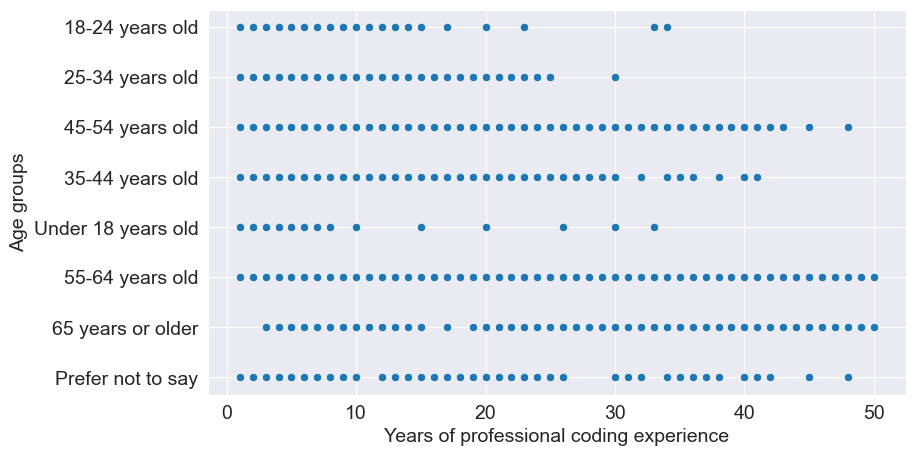

In [83]:
sns.scatterplot(y='Age', x='YearsCodePro', data=survey_df)
plt.ylabel("Age groups")
plt.xlabel("Years of professional coding experience");

You can see points all over the graph, which indicates that you can **start programming professionally at any age**. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

## Database

*Let's findout the famous Database , programmer mostly work with.*

In [84]:
database_work_with = split_multicolumn(survey_df.DatabaseHaveWorkedWith)
database_worked_with_percentages= database_work_with.mean().sort_values(ascending=False)*100
database_worked_with_percentages.head(15)

PostgreSQL                    39.142671
MySQL                         35.307903
SQLite                        26.549605
MongoDB                       21.927700
Microsoft SQL Server          21.871636
Redis                         17.535657
MariaDB                       15.131638
Elasticsearch                 11.507670
Oracle                         8.417429
Dynamodb                       7.622443
Firebase Realtime Database     5.537989
Cloud Firestore                5.495380
BigQuery                       3.875135
Microsoft Access               3.652000
H2                             3.148547
dtype: float64

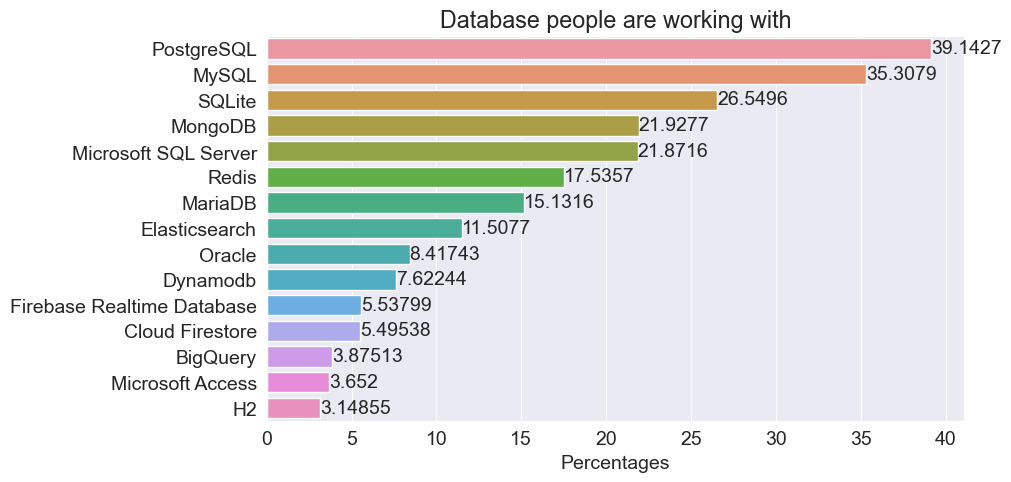

In [91]:
ax=sns.barplot(x =database_worked_with_percentages.head(15) , y= database_worked_with_percentages.head(15).index )
plt.title('Database people are working with')
plt.xlabel('Percentages');
for bars in ax.containers:
    ax.bar_label(bars);

It appears that`PostgreSQL`,`MySQL`,`SQLite`,`MongoDB` are very famous Database used by programmers.

*Let's explore that which database , programmers are more intrested to learn next year*

In [86]:
database_want_to_work_with = split_multicolumn(survey_df.DatabaseWantToWorkWith)
database_want_to_work_with_percentages= database_want_to_work_with.mean().sort_values(ascending=False)*100
db=database_want_to_work_with_percentages.head(15)
print(db)

PostgreSQL                    35.376301
MySQL                         19.923977
SQLite                        18.986590
Redis                         18.983226
MongoDB                       18.538079
Microsoft SQL Server          13.019151
Elasticsearch                 10.925727
MariaDB                        9.325664
Dynamodb                       6.248879
Firebase Realtime Database     4.663393
Supabase                       4.421197
Cassandra                      4.118452
Cloud Firestore                4.110603
BigQuery                       4.084813
Oracle                         3.965958
dtype: float64


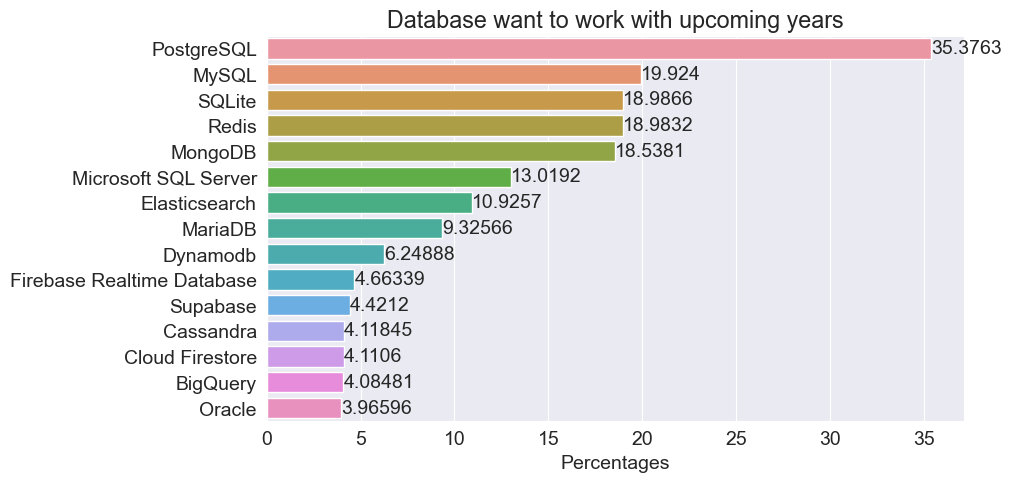

In [92]:
ax=sns.barplot(x = db, y= db.index);
plt.title("Database want to work with upcoming years");
plt.xlabel('Percentages');
for bars in ax.containers:
    ax.bar_label(bars);

## Platform

*Let's fintout which platform is mostly used by the working professionals*

In [93]:
platform = split_multicolumn(survey_df.PlatformHaveWorkedWith)
platform_percentages = platform.mean().sort_values(ascending = False)*100
platform_percentages

Amazon Web Services (AWS)            37.919358
Microsoft Azure                      20.300727
Google Cloud                         18.604234
Firebase                             12.066066
Cloudflare                           11.884419
Digital Ocean                        10.426758
Heroku                                9.371636
Vercel                                8.332212
Netlify                               6.983315
VMware                                5.566021
Hetzner                               3.441200
Linode, now Akamai                    3.089119
Managed Hosting                       2.667519
OVH                                   2.666398
Oracle Cloud Infrastructure (OCI)     2.029512
OpenShift                             1.873654
Fly.io                                1.848986
Vultr                                 1.521573
Render                                1.443084
OpenStack                             1.206494
IBM Cloud Or Watson                   0.898143
Scaleway     

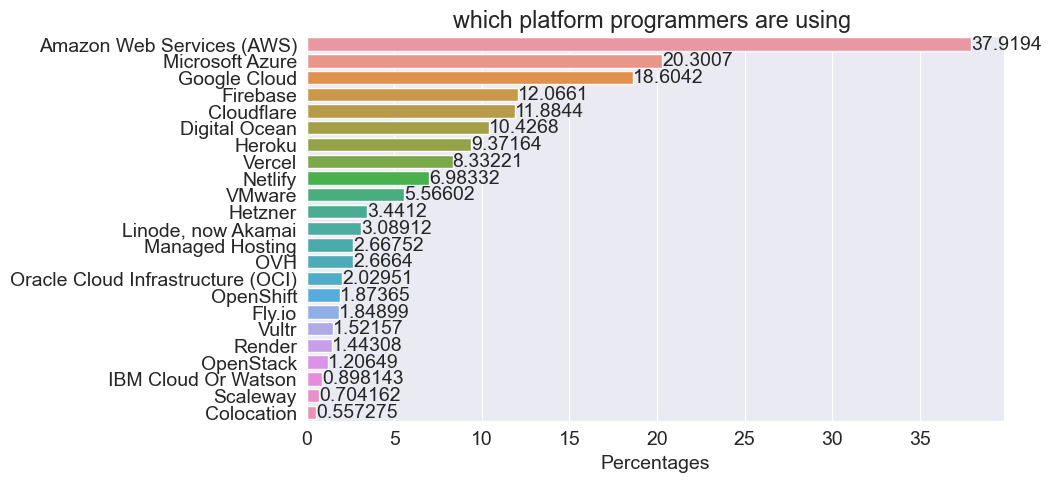

In [95]:
ax=sns.barplot(x= platform_percentages, y= platform_percentages.index );

plt.title("which platform programmers are using ");
plt.xlabel('Percentages');
for bars in ax.containers:
    ax.bar_label(bars);

  It appears that `AWS`, `Microsoft Azure`, `Google Cloud`,`Firebase`  are the most famous platforms used by programmers.

## WebFrame

*Let's findout which webframe is mosty used by programmers*

In [96]:
webframe = split_multicolumn(survey_df.WebframeHaveWorkedWith)
webframe_percentages = webframe.mean().sort_values(ascending=False)*100
webframe_percentages.head(20)

Node.js          34.340240
React            32.670658
jQuery           17.698242
Express          15.521842
Angular          14.057454
Next.js          13.423933
ASP.NET CORE     13.338715
Vue.js           13.183979
WordPress        10.768748
ASP.NET          10.298933
Flask             9.793236
Spring Boot       9.623924
Django            9.237083
Laravel           6.099749
FastAPI           5.970802
AngularJS         5.803732
Svelte            5.329431
Ruby on Rails     4.417833
NestJS            4.127422
Blazor            3.925592
dtype: float64

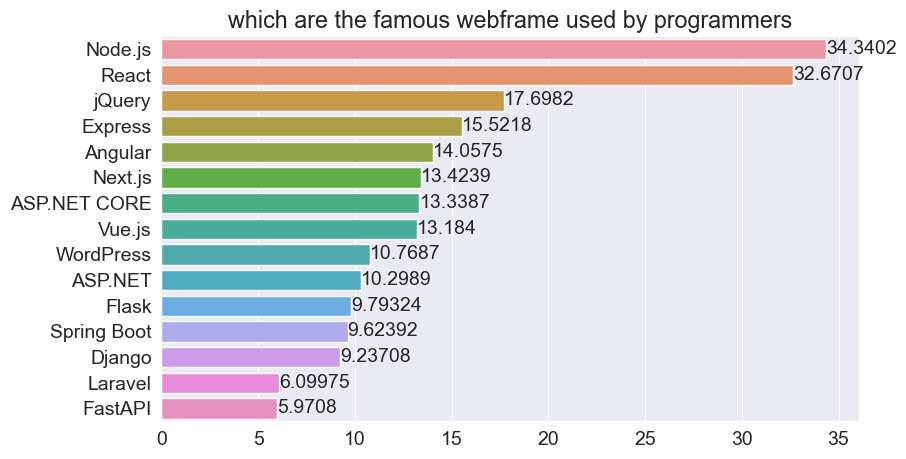

In [97]:
ax=sns.barplot( x= webframe_percentages.head(15) , y = webframe_percentages.head(15).index );
plt.title('which are the famous webframe used by programmers');
for bars in ax.containers:
    ax.bar_label(bars);

We can clearly see that  `Node.js`, `React`, `jQuery`, `Express`, `Angular` are the famous webframe.

## AI Tools

*Another intresting question is that , which AI tool programmers mostly used for searching purposes*

In [98]:
aitool = split_multicolumn(survey_df.AISearchHaveWorkedWith)
aitool_percentages = aitool.mean().sort_values(ascending= False)*100
aitool_percentages

ChatGPT           58.824453
Bing AI           14.555301
WolframAlpha       9.440034
Google Bard AI     6.970981
Phind              2.317680
You.com            1.795165
Perplexity AI      0.828624
Quora Poe          0.720981
Neeva AI           0.324049
Andi               0.216407
Metaphor           0.141281
dtype: float64

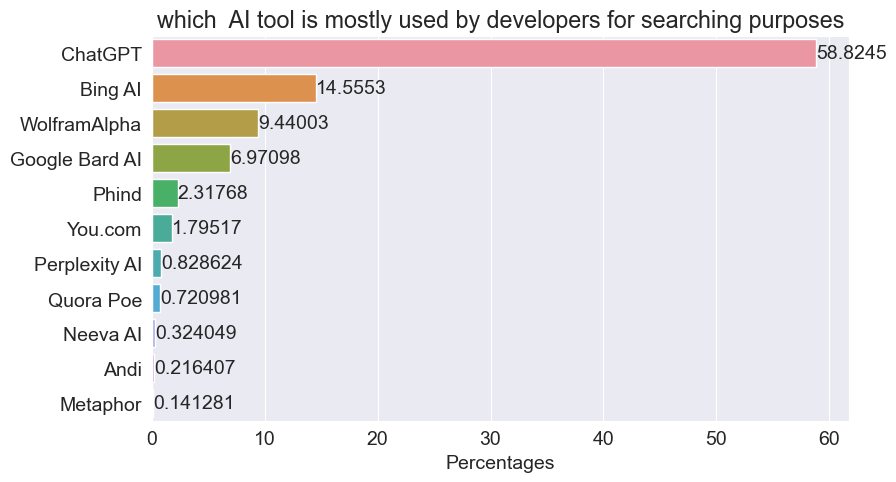

In [101]:
ax=sns.barplot( x= aitool_percentages , y= aitool_percentages.index );
plt.title('which  AI tool is mostly used by developers for searching purposes');
plt.xlabel('Percentages')
for bars in ax.containers:
    ax.bar_label(bars);


It is not suprising that most developers are using `ChatGPT` for searching purposes.

*Let's findout which AI Tools is used by Developers for developing purposes*

In [102]:
aidev = split_multicolumn(survey_df.AIDevHaveWorkedWith);
aidev_percentages = aidev.mean().sort_values(ascending=False)*100
aidev_percentages


GitHub Copilot        24.755562
Tabnine                5.822793
AWS CodeWhisperer      2.322165
Synk Code              0.603247
Codeium                0.565124
Whispr AI              0.510181
Replit Ghostwriter     0.375628
Mintlify               0.236590
Adrenaline             0.195102
Rubber Duck.AI         0.169313
dtype: float64

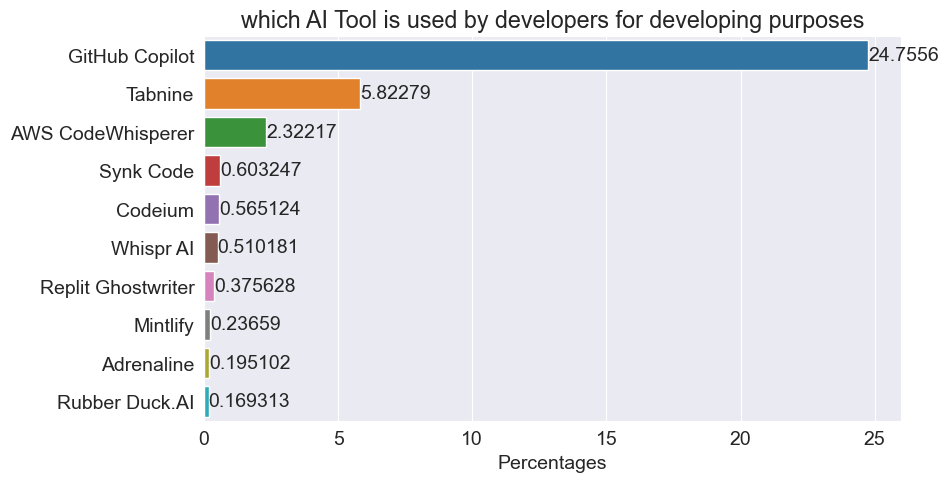

In [103]:
ax=sns.barplot(x =aidev_percentages , y= aidev_percentages.index);
plt.title('which AI Tool is used by developers for developing purposes');
plt.xlabel('Percentages');
for bars in ax.containers:
    ax.bar_label(bars);